# Decorrelating your data and dimension reduction
Dimension reduction summarizes a dataset using its common occuring patterns. In this chapter, you'll learn about the most fundamental of dimension reduction techniques, "Principal Component Analysis" ("PCA"). PCA is often used before supervised learning to improve model performance and generalization. It can also be useful for unsupervised learning. For example, you'll employ a variant of PCA will allow you to cluster Wikipedia articles by their content!

# 1. Visualizing the PCA transformation
## 1.1 Correlated data in nature
You are given an array `grains` giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

### Instructions:
* Import:
    * `matplotlib.pyplot` as `plt`.
    * `pearsonr` from `scipy.stats`.
* Assign column `0` of `grains` to `width` and column `1` of `grains` to `length`.
* Make a scatter plot with `width` on the x-axis and `length` on the y-axis.
* Use the `pearsonr()` function to calculate the Pearson correlation of `width` and `length`.

In [1]:
import pandas as pd

grains = pd.read_csv('_datasets/seeds-width-vs-length.csv', header=None).values

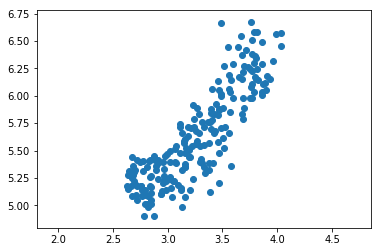

0.8604149377143467

In [3]:
# Perform the necessary imports
import matplotlib.pyplot as plt
% matplotlib inline
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
correlation

As you would expect, the width and length of the grain samples are highly correlated.

# 1.2 Decorrelating the grain measurements with PCA
You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

### Instructions:
* Import `PCA` from `sklearn.decomposition`.
* Create an instance of `PCA` called `model`.
* Use the `.fit_transform()` method of `model` to apply the PCA transformation to `grains`. Assign the result to `pca_features`.
* The subsequent code to extract, plot, and compute the Pearson correlation of the first two columns `pca_features` has been written for you.

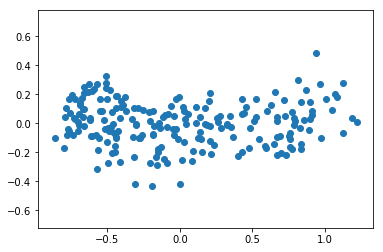

4.983104599635362e-17

In [4]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
correlation

You've successfully decorrelated the grain measurements with PCA!

## 1.3 Principal components
On the right are three scatter plots of the same point cloud. Each scatter plot shows a different set of axes (in red). In which of the plots could the axes represent the principal components of the point cloud?

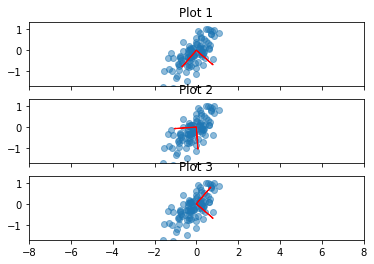

In [7]:
# generate Gaussian point cloud, centred at origin
import numpy as np
np.random.seed(1)
mean = [0, 0]
cov = np.array([[1, .75], [.75, 1]]) * 0.5
points = np.random.multivariate_normal(mean, cov, 100)

# Use PCA to determine the PCs
from sklearn.decomposition import PCA

model = PCA()
model.fit(points)

axis_sets = [model.components_]

# rotate and invert to create some alternatives
angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -1 * np.sin(angle)], [np.sin(angle), np.cos(angle)]])
rotated = model.components_.dot(rotation_matrix)
axis_sets.append(rotated)

inverted = np.array(model.components_)
inverted[0,:] *= -1
axis_sets.append(inverted)

# Make the plots
import matplotlib.pyplot as plt

num_plots = len(axis_sets)
f, axarr = plt.subplots(num_plots, sharex=True, sharey=False)
for plot_num, ax, axis_set in zip(range(1, num_plots + 1), axarr, axis_sets):
    ax.scatter(points[:,0], points[:,1], alpha=0.5)
    for vec in axis_set:
        ax.arrow(0, 0, vec[0], vec[1], color='red', width=0.015)
    ax.set_title('Plot %i' % plot_num)
    ax.axis('equal')
    ax.set_xlim([-8, 8])
plt.show()

Recall that the principal components are the directions along which the the data varies.

Possible Answers:
1. None of them.
2. Both plot 1 and plot 3.
3. Plot 2.

Answer: The principal components have to align with the axes of the point cloud. This happens in both plot 1 and plot 3. (2)